In [ ]:
# To run as slideshow:
!jupyter nbconvert Intro_to_ML_and_Regression.ipynb --to slides --post serve

[NbConvertApp] Converting notebook Intro_to_ML_and_Regression.ipynb to slides
[NbConvertApp] Writing 684885 bytes to Intro_to_ML_and_Regression.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.1.0
Serving your slides at http://127.0.0.1:8000/Intro_to_ML_and_Regression.slides.html
Use Control-C to stop this server


<span style="font-size: 4em;">
 Intro to Machine Learning</span>

# Types of machine learning problems

**Supervised:** making new predictions based on an existing pattern

**Unsupervised:** extracting structures that exisit in the data

**Semi-supervised:** extracting structures while making predictions (used when you have few labels)

In [7]:
# Plotting Tools:

from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
%matplotlib inline

digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
#----------------------------------------------------------------------
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

# Supervised Learning

Based on labeled training data.

We need to generalize from training data to testing data.

For example, the digits dataset:

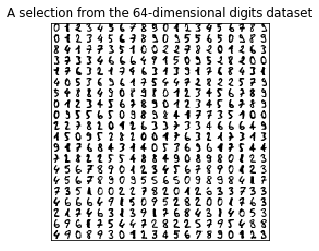

In [20]:
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')

If we have some labeled digits, we need to make the model label **new** unobserved digits correctly.

# Unsupervised Learning

No labeled training data.

The only thing we can do is finding a way to extract the data's structure.

For example, cluster digits dataset using t-SNE

Computing t-SNE embedding


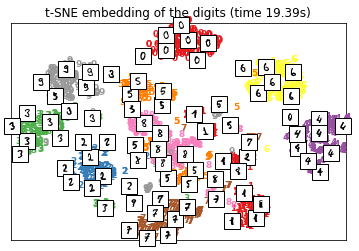

In [21]:
#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

# Semi-supervised Learning

Have little labeled training data.

We need to extracting the data's structure while generalizing using the labeled training data.

# Types of data

continuous: quantitative

e.g.: Boston House Price Dataset, etc.

categorical: qualitative

e.g.: MNIST, SVHN, cifar-10, cifar-100, ImageNet (Most popular in machine learning society)

# Types of machine learning solutions

|            |continuous          |categorical
|------------|--------------------|
|supervised  |regression          |classification
|unsupervised|dimension reduction |clustering

# Classification Problems

Recall: supervised and categorical problems

Goal: Predict the label with the observed attributes

'Supervised' means we know the labels

# Steps

* Split Dataset
    * Training data, Validation data, Test data

* Train the model
    * Learn the right parameters

* Tune the model
    * This is what the validation data is for
    * used to pick the "hyper-parameters"
        * (We will see an example of hyper-parameters in the Regression section)

* Test Model
    * This is done to estimate how the model will behave in the wild.

* Make Predictions
    * Use your model to label new data unknown data "in production"

## Example: Softmax Regression on MNIST

In [8]:
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
mnist = read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


* Notice that it already has training set and testing set.
* The validation data is taken out of the training set.

## Samples from MNIST

([], <a list of 0 Text yticklabel objects>)

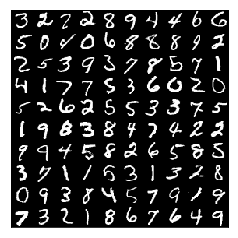

In [9]:
x, _= mnist.test.next_batch(100)  
x = x.reshape([-1, 28, 28])  
image = np.zeros((280, 280))
for i in range(10):
    for j in range(10):
        image[28 * i: 28 * (i+1),28 * j: 28 * (j+1)] = x[10 * i + j]
plt.imshow(image, cmap=plt.cm.gray)  
plt.xticks([])
plt.yticks([])

\* Click down to see the Neural Network trained for this data.

In [40]:
import tensorflow as tf
# Build the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
regularizer = tf.reduce_mean(tf.square(W)) # L2 regularizer
loss = regularizer + 1.0 * cross_entropy
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

# Define accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [43]:
# Train the model
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    _, accu = sess.run([train_step, accuracy], feed_dict={x: batch_xs, y_: batch_ys})
    if i%100 == 0:
        print('Iter {} Training Accuracy {:.4f} Validation Accuracy {:.4f}'.format(i, accu, sess.run(accuracy, feed_dict={x: mnist.validation.images, y_:mnist.validation.labels})))

Iter 0 Training Accuracy 0.9200 Validation Accuracy 0.9198
Iter 100 Training Accuracy 0.9400 Validation Accuracy 0.9226
Iter 200 Training Accuracy 0.9200 Validation Accuracy 0.9188
Iter 300 Training Accuracy 0.9300 Validation Accuracy 0.9218
Iter 400 Training Accuracy 0.9100 Validation Accuracy 0.9210
Iter 500 Training Accuracy 0.9100 Validation Accuracy 0.9236
Iter 600 Training Accuracy 0.9500 Validation Accuracy 0.9190
Iter 700 Training Accuracy 0.9100 Validation Accuracy 0.9196
Iter 800 Training Accuracy 0.9500 Validation Accuracy 0.9238
Iter 900 Training Accuracy 0.9000 Validation Accuracy 0.9244


In [44]:
# Test the model
print('Test Accuracy {}'.format(sess.run(accuracy, feed_dict={x: mnist.test.images, y_:mnist.test.labels})))

Test Accuracy 0.914399981499


# Building Effective Classifiers

## What types of prediction error will we run into?

* **Training Error**: The prediction error of training dataset.

* **Generalization Error**: The prediction error of testing dataset.

* **OOS error**: The true prediction error.

# Why should we use training & test sets?

We can make the model arbitrarily complex (effectively “memorizing” the entire training set).

This is called "overfitting" or adding "variance" to your data.

**Conclusion** Training error is not a good estimate of OOS accuracy.

# Binary classification example:

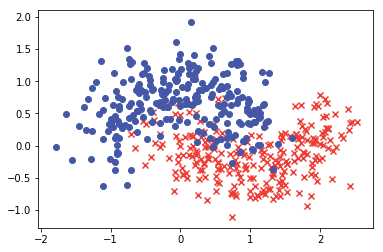

In [120]:
from sklearn.datasets import make_moons 
from sklearn.cross_validation import train_test_split
X, y = make_moons(n_samples=500, random_state=1, noise=0.3)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='#EE3D34', marker='x') 
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='#4458A7', marker='o')

In [1]:
from matplotlib.colors import ListedColormap
def detect_plot_dimension(X, h=0.02, b=0.05):
    x_min, x_max = X[:, 0].min() - b, X[:, 0].max() + b
    y_min, y_max = X[:, 1].min() - b, X[:, 1].max() + b
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    dimension = xx, yy
    return dimension

def detect_decision_boundary(dimension, model):
    xx, yy = dimension # unpack the dimensions
    boundary = model.predict(np.c_[xx.ravel(), yy.ravel()])
    boundary = boundary.reshape(xx.shape) # Put the result into a color plot
    return boundary

def plot_decision_boundary(panel, dimension, boundary, colors=['#DADDED', '#FBD8D8']):
    xx, yy = dimension # unpack the dimensions
    panel.contourf(xx, yy, boundary, cmap=ListedColormap(colors), alpha=1)
    panel.contour(xx, yy, boundary, colors="g", alpha=1, linewidths=0.5) # the decision boundary in green

def plot_dataset(panel, X, y, colors=["#EE3D34", "#4458A7"], markers=["x", "o"]):
    panel.scatter(X[y == 1, 0], X[y == 1, 1], color=colors[0], marker=markers[0])
    panel.scatter(X[y == 0, 0], X[y == 0, 1], color=colors[1], marker=markers[1])

def calculate_prediction_error(model, X, y):
    yPred = model.predict(X)
    score = 1 - round(metrics.accuracy_score(y, yPred), 2)
    return score

def plot_prediction_error(panel, dimension, score, b=.3):
    xx, yy = dimension # unpack the dimensions
    panel.text(xx.max() - b, yy.min() + b, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')

def explore_fitting_boundaries(model, n_neighbors, datasets, width):
    # determine the height of the plot given the aspect ration of each panel should be equal
    height = float(width)/len(n_neighbors) * len(datasets.keys())
    nrows = len(datasets.keys())
    ncols = len(n_neighbors)
    
    # set up the plot
    figure, axes = plt.subplots(
    nrows,
    ncols,
    figsize=(width, height),
    sharex=True,
    sharey=True
    )
    
    dimension = detect_plot_dimension(X, h=0.02) # the dimension each subplot based on the data

    # Plotting the dataset and decision boundaries

    i = 0
    for n in n_neighbors:
        model.n_neighbors = n
        model.fit(datasets["Training Set"][0], datasets["Training Set"][1])
        boundary = detect_decision_boundary(dimension, model)
        j = 0
        for d in datasets.keys():
            try:
                panel = axes[j, i]
            except (TypeError, IndexError):
                if (nrows * ncols) == 1:
                    panel = axes
                elif nrows == 1: # if you only have one dataset
                    panel = axes[i]
                elif ncols == 1: # if you only try one number of neighbors
                    panel = axes[j]
            plot_decision_boundary(panel, dimension, boundary) # plot the decision boundary
            plot_dataset(panel, X=datasets[d][0], y=datasets[d][1]) # plot the observations
            score = calculate_prediction_error(model, X=datasets[d][0], y=datasets[d][1])
            plot_prediction_error(panel, dimension, score, b=0.2) # plot the score

            # make compacted layout

            panel.set_frame_on(False)
            panel.set_xticks([])
            panel.set_yticks([])

            # format the axis labels

            if i == 0:
                panel.set_ylabel(d)
            if j == 0:
                panel.set_title('k={}'.format(n))
                j += 1
        i += 1
    plt.subplots_adjust(hspace=0, wspace=0) # make compacted layout

# Solving with KNN to solve this problem:

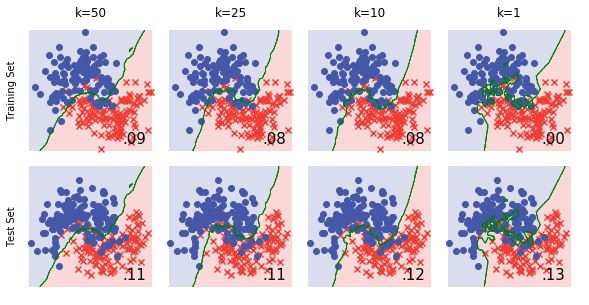

In [135]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=0, test_size=0.5)
model = KNeighborsClassifier()
n_neighbors = [50,25,10,1]
datasets = {
"Training Set": [XTrain, yTrain],
"Test Set": [XTest, yTest]
}
width = 10

explore_fitting_boundaries(model=model, n_neighbors=n_neighbors, datasets=datasets, width=width)

The digits in the bottom right corner is the error of the boundary.

Generally, a smaller k can cause the overfitting.

# Generalization Error

Things go wrong when we compare on a different train/test split. 

The error on the test data will not be the same. Because it was too tied to the train sample.

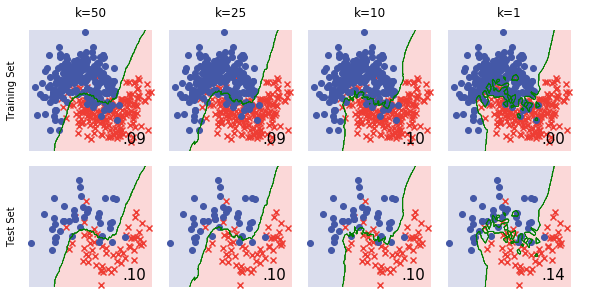

In [136]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=1, test_size=0.2)
model = KNeighborsClassifier()
n_neighbors = [50, 25, 10, 1]
datasets = {
"Training Set": [XTrain, yTrain],
"Test Set": [XTest, yTest]
}
width = 10

explore_fitting_boundaries(model=model, n_neighbors=n_neighbors, datasets=datasets, width=width)

Test set error is a better estimate of future performance than training error.

<span style="font-size: 4em;">
Linear Regression </span> 

## Intro to regression
We use regression methods to solve **supervised** problems where we are predicting a **continuous** variable. 
Regression model: a functional relationship between input and the "target" variable(s)

The simple linear regression model captures a linear relationship between a single input variable x and a response variable y:

$y=\beta_0 + \beta_1 x + \epsilon$

$y$ = response variable (the one we want to predict)
$x$ = input variable (the one we use to train the model)

$\alpha$ = intercept (where the line crosses the y-axis)
$\beta$ = regression coefficient (the model “parameter”)
$\epsilon$ = residual (the prediction error)

## Multiple Linear Regression
$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon$ 


## Fit a regression model to a dataset
* In Ordinary least squares we are minimizing the sum of the squared residuals. 
    * (OLS short for ordinary least squares)

Coefficients: [ 938.23786125]
the mean sqare error:2548.07


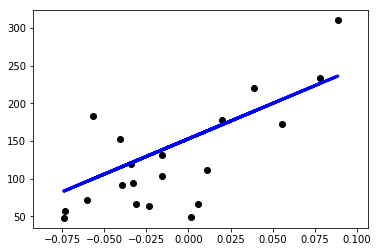

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,linear_model
import time

diabetes = datasets.load_diabetes()

# Only use one feature to show the result
diabetes_X=diabetes.data[:,np.newaxis,2]
 
# train-test split
diabetes_X_train=diabetes_X[:-20]
diabetes_X_test=diabetes_X[-20:]
 
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]
 
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train,diabetes_y_train)

print('Coefficients:',regr.coef_)

print('the mean sqare error:%.2f' %np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2))

plt.scatter(diabetes_X_test,diabetes_y_test,color='black')
plt.plot(diabetes_X_test,regr.predict(diabetes_X_test),color='blue',linewidth=3)
plt.xticks()
plt.yticks()
plt.show()

In [5]:
diabetes = datasets.load_diabetes()

 
diabetes_X_train=diabetes.data[:-20]
diabetes_X_test=diabetes.data[-20:]
 
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]
 
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train,diabetes_y_train)

print('Coefficients:',regr.coef_)

print('the mean sqare error:%.2f' %np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2))

print('Variance score:%.2f' %regr.score(diabetes_X_test,diabetes_y_test))

Coefficients: [  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]
the mean sqare error:2004.57
Variance score:0.59


In [3]:
import numpy as np
c=np.arange(1,10,0.1)
print(np.corrcoef(c**9, c**10))

[[ 1.          0.99876095]
 [ 0.99876095  1.        ]]


# Polynomial Regression

For 1 input feature $x$

$y = \beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_n x^n + \epsilon$

For 2 input features $x_1$ and $x_2$

$y = \beta_0 + \beta_{1,0} x_1 + \beta_{0,1}x_2 + \beta_{1,1} x_1x_2 + \beta_{2,0} x_1^2+ \beta_{0,2} x_2^2 + ... + \beta_{n,m} x_1^nx_1^m + \epsilon$




* Can be considered as a special case of multiple linear regression.

* However, this may lead to multicollinearity, 
    * which means the predictor variables are highly correlated with each other.

Multicollinearity causes the linear regression model to break down, because it can’t tell the predictor variables apart.

We can replace the correlated predictors with uncorrelated predictors using basis functions.

$y = \beta_0 + \beta_1 f_1(x) + \beta_2 f_2(x^2) + ... + \beta_n f_n(x^n) + \epsilon$

# Regularization

* Recall when we overfit the data in our KNN example
    * (AKA we had "too much variance" in our model)

An overfit model matches the noise in the dataset instead of the signal.

This happens when our model becomes too complex for the data to support.

## How to define the complexity of a regression model?

One method is to define complexity as a function of the size of the coefficients.

For example:

$\sum|\beta_i|$, or the so-called L1-norm

$\sum \beta_i^2$, or the so-called L2-norm

## Regularization basic idea

Basic idea: restrict the model's complexity

L1 regularization: $y = \sum\beta_i x_i + \epsilon \quad st. \sum |\beta_i| < s$, which is also called LASSO Regression.

L2 regularization: $y = \sum\beta_i x_i + \epsilon \quad st. \sum \beta_i^2 < s$, which is also called Ridge Regression.

These regularization problems can also be expressed as: 

L1 regularization: $\min(||\mathbf{y} – \mathbf{x}\cdot \mathbf{\beta}||_2 + \lambda||\beta||_1)$

L2 regularization: $\min( ||\mathbf{y} – \mathbf{x} \cdot \mathbf{\beta} ||_2 + \lambda ||\beta ||_2 )$

There's a trade-off between accuracy and complexity.

# Performance with $L_1$ Regression (LASSO)

In [7]:
#LASSO "L1" example:
regr = linear_model.Lasso()
regr.fit(diabetes_X_train,diabetes_y_train)

print('Coefficients:',regr.coef_)

print('the mean sqare error:%.2f' %np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2))

print('Variance score:%.2f' %regr.score(diabetes_X_test,diabetes_y_test))

Coefficients: [ 496.66920971]
the mean sqare error:3482.77
Variance score:0.28


# Bias and Variance

* Bias refers to predictions that are systematically inaccurate.
    * In machine learning this happens when you have ***too little complexity*** in your model

* Variance refers to predictions that are generally inaccurate.
    * In machine learning this happens when you have ***too much complexity*** in your model
    

 * *Too much complexity leads to overfitting*

(Aſter some math) generalization error in our model can be decomposed into a bias component and variance component.

In Regularized Regression, this  tradeoff is regulated by the hyperparameter $\lambda$, which we’ve already seen:

L1 regularization: $y = \sum\beta_i x_i + \epsilon \quad st. \sum |\beta_i| < \lambda$

L2 regularization: $y = \sum\beta_i x_i + \epsilon \quad st. \sum \beta_i^2 < \lambda$

# Tuning on Validation Data
Regularization represents a method balance too much bias for too much variance:

 * It lets us pick the right amount of complexity in the model
 

 * How do we know what is the right amount?

1.We keep a **Validation Data Set** separated from the training data.
 

2.We for each hyperparameter choice, we train a different model.
 

3.We select the hyperparameter choice that performs best on the Validation data.     

***Warning:*** *validation set is used to tune - it is different from the test set which is used to determine OOS performance* 

# Cross-validation

* Cross validation is a form of hyperparameter tuning that you do when you don't have enough data to spare on a separate validation set. 

* Instead you split the dataset multiple times, and take the average generalization error as a OOS set that you held out.
    * Different sets in each "fold" of the cross-validation.

# Steps of n-fold cross-validation

* Randomly split the dataset into n equal partitions.

* Use partition 1 as test set & union of other partitions as training set.

* Find error on the part that was held out.

* Repeat the previous two steps using a different partition as the test set at each iteration.

* Take the average generalization error as the estimate performance for hypertuning.

# Examples:

In [147]:
import numpy as np
from sklearn.cross_validation import train_test_split, cross_val_score

knn = KNeighborsClassifier()

n_neighbors = np.array([1, 10, 25, 50])

train_scores = list()
test_scores = list()
cv_scores = list()

for n in n_neighbors:
    knn.n_neighbors = n
    knn.fit(XTrain, yTrain)
    train_scores.append(1 - metrics.accuracy_score(yTrain, knn.predict(XTrain))) # this will over-estimate the accuracy
    test_scores.append(1 - metrics.accuracy_score(yTest, knn.predict(XTest)))
    cv_scores.append(1 - cross_val_score(knn, XTrain, yTrain, cv = 10).mean()) # you take the mean of the CV scores

# what do these different datasets think is the best value of k?

print(
'The best values of k are: \n'
'{} according to the Training Set\n'
'{} according to the Test Set \n'
'{} according to Cross-Validation'.format(
min(n_neighbors[train_scores == min(train_scores)]),
min(n_neighbors[test_scores == min(test_scores)]),
min(n_neighbors[cv_scores == min(cv_scores)])
)
)

The best values of k are: 
1 according to the Training Set
10 according to the Test Set 
50 according to Cross-Validation


## Features of n-fold cross-validation:

* More accurate estimate of OOS prediction error. 

*  More efficient use of data than single train/test split. Each record in our dataset is used for both training and testing. 

* Presents tradeoff between efficiency and computational expense. 10-fold CV is 10x more expensive than a single train/test split 

* Can be used for model selection.